Disini tempat mapping level-level ppkm jakarta dari waktu ke waktu

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Tanggal'>

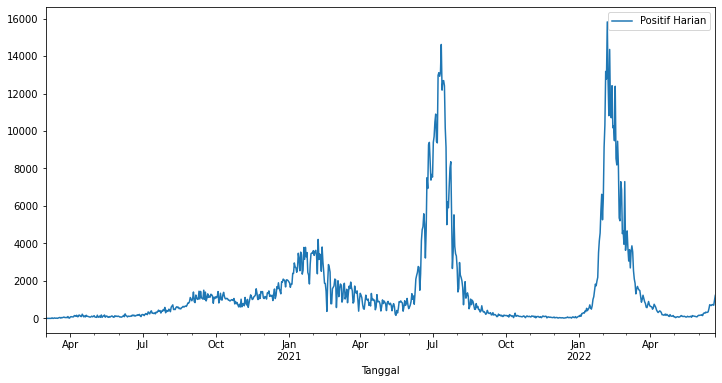

In [4]:
data = pd.read_excel(
    "../../data/covid-indo/raw/Daily Update Data Agregat Covid-19 Jakarta.xlsx", sheet_name="Data Jakarta")
positif_harian = data[["Tanggal", "Positif Harian"]]
positif_harian["Tanggal"] = pd.to_datetime(positif_harian["Tanggal"])
positif_harian.set_index("Tanggal", inplace=True)
positif_harian.plot(figsize=(12, 6))

Kenaikan covid ada di bulan:
- Oktober 2020
- Februari 2021
- Juli 2021
- Februari 2022

Range bulan sebelum dan setelah kenaikan $\pm$ 2 bulan
\
[Sumber](https://kompaspedia.kompas.id/baca/paparan-topik/psbb-hingga-ppkm-kebijakan-pemerintah-menekan-laju-penularan-covid-19)

In [8]:
data_kebijakan = pd.read_excel("../../data/kebijakan/kebijakan_mapping.xlsx")
data_kebijakan["Tanggal"] = pd.to_datetime(data_kebijakan["Tanggal"])
data_kebijakan.set_index("Tanggal", inplace=True)
data_kebijakan

,Kebijakan
Tanggal,
2020-04-10,PSBB
2020-04-11,PSBB
2020-04-12,PSBB
2020-04-13,PSBB
2020-04-14,PSBB
...,...
2021-10-12,PPKM lv 3 dan 4
2021-10-13,PPKM lv 3 dan 4
2021-10-14,PPKM lv 3 dan 4


In [35]:
kebijakan_merge = pd.merge(positif_harian, data_kebijakan, on="Tanggal")
kebijakan_merge.fillna("Tidak Diketahui", inplace=True)
kebijakan_merge

,Positif Harian,Kebijakan
Tanggal,,
2020-04-10,91,PSBB
2020-04-11,93,PSBB
2020-04-12,179,PSBB
2020-04-13,160,PSBB
2020-04-14,107,PSBB
...,...,...
2021-10-12,143,PPKM lv 3 dan 4
2021-10-13,278,PPKM lv 3 dan 4
2021-10-14,113,PPKM lv 3 dan 4


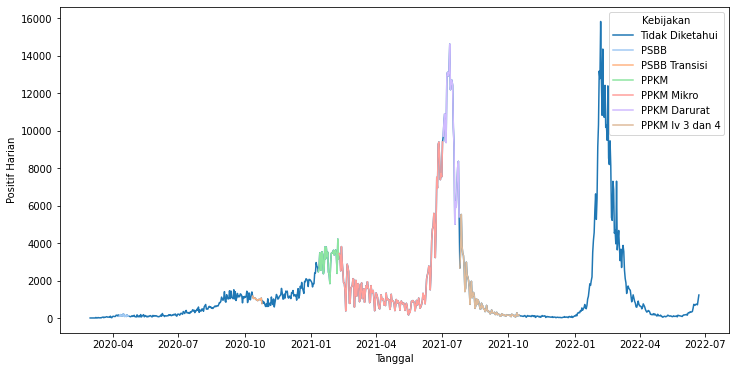

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=positif_harian, x="Tanggal", y="Positif Harian", label="Tidak Diketahui")
sns.lineplot(x="Tanggal", y="Positif Harian", data=kebijakan_merge, hue="Kebijakan", palette="pastel")
plt.show()

In [48]:
import pickle
kebijakan_dict=data_kebijakan.to_dict()
pickle.dump(kebijakan_dict, open("kebijakan_dict.pkl", "wb"))

In [50]:
pd.DataFrame(pickle.load(open("kebijakan_dict.pkl", "rb")))

,Kebijakan
2020-04-10,PSBB
2020-04-11,PSBB
2020-04-12,PSBB
2020-04-13,PSBB
2020-04-14,PSBB
...,...
2021-10-12,PPKM lv 3 dan 4
2021-10-13,PPKM lv 3 dan 4
2021-10-14,PPKM lv 3 dan 4
2021-10-15,PPKM lv 3 dan 4
